In [105]:
##Packages Importing 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [106]:
##Creating a data frame
df=pd.read_csv('D:\ML Datasets\project\Wine Quality\winequality-red.csv')
df.columns
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


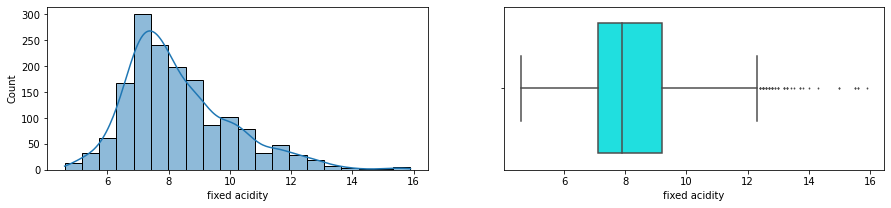

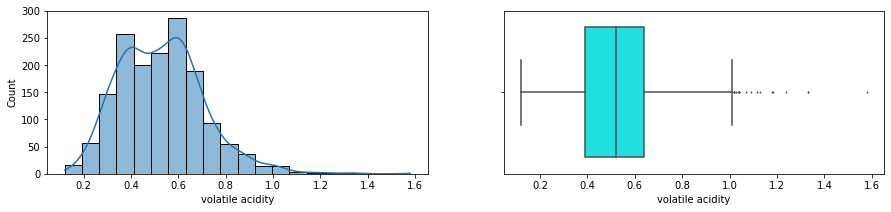

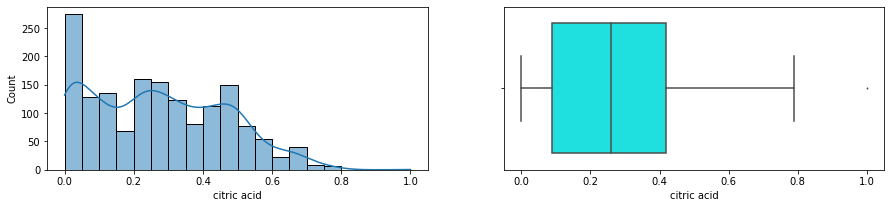

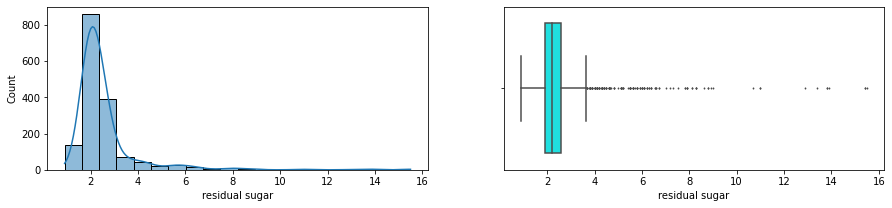

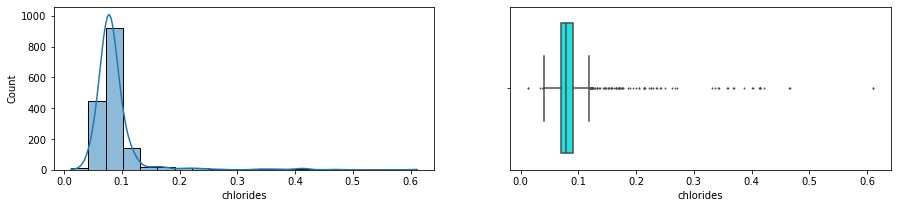

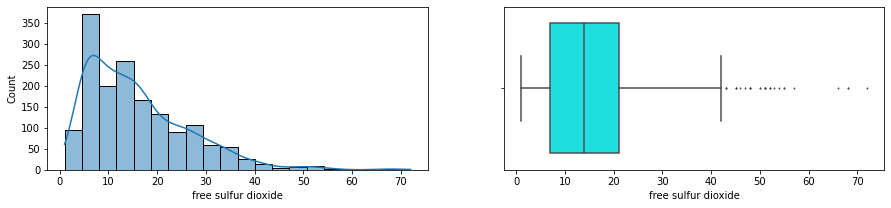

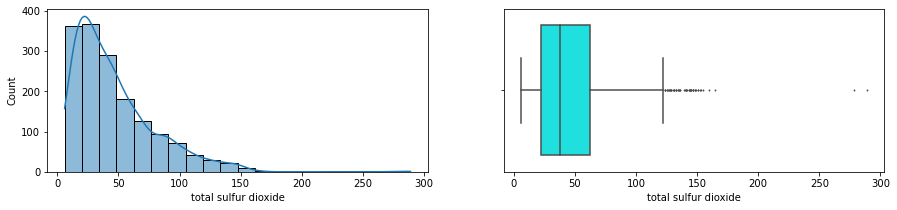

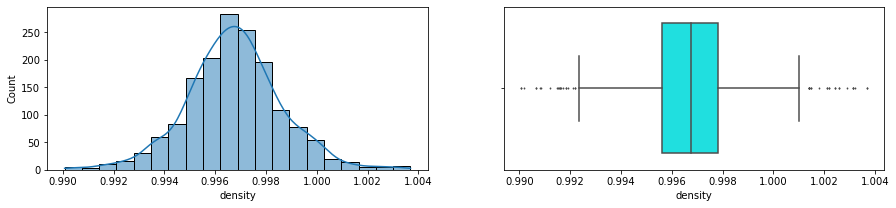

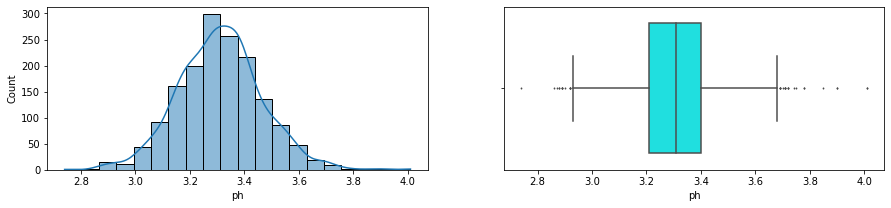

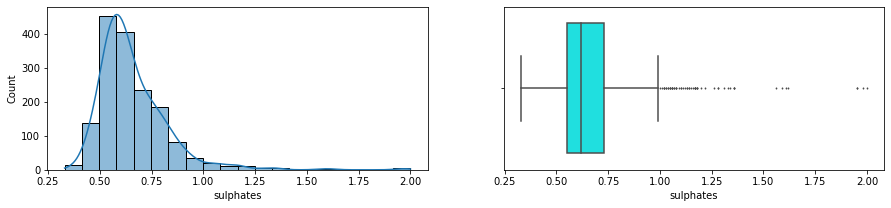

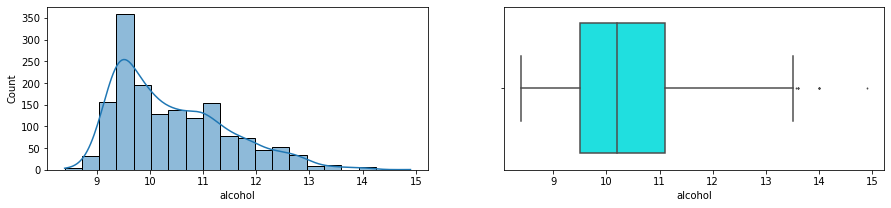

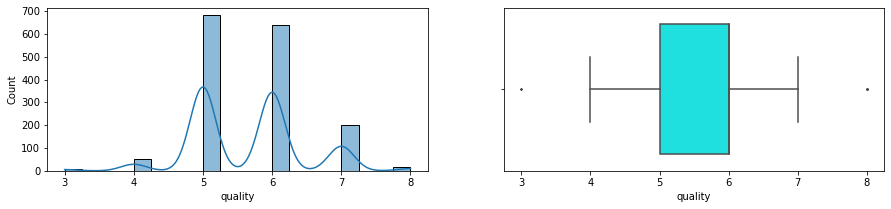

In [107]:
##Visualising the data
df.columns=df.columns.str.strip().str.lower()
df.isnull().sum()
for i in df:
    fig, axs = plt.subplots(1,2,figsize=(15, 3))
    sns.histplot(df[i],bins=20, kde=True,ax=axs[0])
    sns.boxplot(df[i], ax = axs[1], color='aqua', fliersize=1);


In [108]:
# lets see the correlation between eachother by using heatmap
df.corr().style.background_gradient(cmap="Reds")



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
ph,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [109]:
##Corelation removing 
fea=[]
for a in range(len(df.corr().columns)):
     for b in range(a):
            if abs(df.corr().iloc[a,b]) > 0.6:
                fea.append(df.corr().columns[a])
for i in fea:
    df.drop([i],axis=1,inplace=True)
df

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.700,1.9,0.076,11.0,0.56,9.4,5
1,7.8,0.880,2.6,0.098,25.0,0.68,9.8,5
2,7.8,0.760,2.3,0.092,15.0,0.65,9.8,5
3,11.2,0.280,1.9,0.075,17.0,0.58,9.8,6
4,7.4,0.700,1.9,0.076,11.0,0.56,9.4,5
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,32.0,0.58,10.5,5
1595,5.9,0.550,2.2,0.062,39.0,0.76,11.2,6
1596,6.3,0.510,2.3,0.076,29.0,0.75,11.0,6
1597,5.9,0.645,2.0,0.075,32.0,0.71,10.2,5


In [110]:
# spliting training and testing data
from sklearn.model_selection import train_test_split

X = df.drop(['quality'], axis = 1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [111]:
# Scaling using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

cols = list(X_train.columns)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,0.326927,0.336476,0.112558,0.126932,0.210695,0.199082,0.305580
std,0.156079,0.146721,0.099929,0.082269,0.146017,0.105444,0.159878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.223140,0.068493,0.096828,0.098592,0.131737,0.169231
50%,0.292035,0.330579,0.089041,0.111853,0.183099,0.173653,0.261538
75%,0.407080,0.425620,0.116438,0.130217,0.281690,0.239521,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [113]:
# Initiatlize the model
logreg = LogisticRegression(solver='liblinear', random_state = 0)

# Fit the model
logreg.fit(X_train, y_train)

# Predict data points 
y_pred_test = logreg.predict(X_test)

# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')


Model accuracy score: 57.08%


In [114]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [115]:
model.fit(X_train, y_train)
print((model.score(X_train, y_train))*100)
print((model.score(X_test, y_test))*100)


100.0
70.41666666666667


In [116]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)
df_scaled.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,quality
0,-0.528360,0.961877,-0.453218,-0.243707,-0.466193,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,0.043416,0.223875,0.872638,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-0.169427,0.096353,-0.083669,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,-0.453218,-0.264960,0.107592,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-0.453218,-0.243707,-0.466193,-0.579207,-0.960246,-0.787823


In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
x = df_pca 
x

,0,1,2,3,4,5,6,7
0,1.696895,-0.258061,-0.653314,-0.055847,-0.003806,0.010828,0.136383,-0.412317
1,1.812960,0.458797,0.640559,-0.474913,-0.400999,-1.171030,0.177349,-0.236597
2,1.472656,0.211654,-0.202942,-0.234900,-0.375422,-0.463748,0.271718,-0.204273
3,-0.969570,0.322916,-0.654489,1.278369,1.480975,-0.078594,-0.615893,0.120931
4,1.696895,-0.258061,-0.653314,-0.055847,-0.003806,0.010828,0.136383,-0.412317
...,...,...,...,...,...,...,...,...
1594,1.259552,-0.439548,1.165127,-1.070254,0.611650,-0.072582,-0.128618,0.576711
1595,-0.209722,-0.761792,1.986332,-1.675172,0.734007,-0.571868,0.209322,-0.009078
1596,-0.343267,-0.500699,1.225002,-1.326110,0.373698,-0.101845,0.151152,-0.098353
1597,1.259817,-0.237053,1.208061,-1.359923,0.638144,-0.288389,0.517438,0.056160


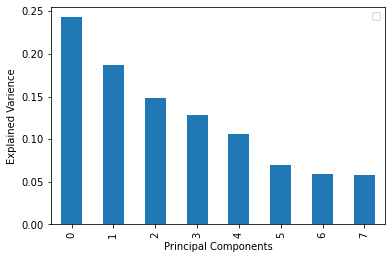

In [118]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

In [119]:
#splitting dataset into a training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [120]:
from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0)
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, Y_train)
y_pred = logmodel.predict(X_test)
print("accuracy score:", accuracy_score(Y_test,y_pred)*100)

accuracy score: 93.75
